In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("charts.csv")

In [5]:
df

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


In [6]:
print("Column Titles:")
print(df.columns)

Column Titles:
Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
       'streams'],
      dtype='object')


In [7]:
print("\nRow Labels (Index):")
print(df.index)


Row Labels (Index):
RangeIndex(start=0, stop=26173514, step=1)


In [8]:
print(df.head())

                         title  rank        date  \
0      Chantaje (feat. Maluma)     1  2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2  2017-01-01   
2   Reggaetón Lento (Bailemos)     3  2017-01-01   
3                       Safari     4  2017-01-01   
4                  Shaky Shaky     5  2017-01-01   

                                  artist  \
0                                Shakira   
1                           Ricky Martin   
2                                   CNCO   
3  J Balvin, Pharrell Williams, BIA, Sky   
4                           Daddy Yankee   

                                                 url     region   chart  \
0  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  Argentina  top200   
1  https://open.spotify.com/track/7DM4BPaS7uofFul...  Argentina  top200   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  Argentina  top200   
3  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  Argentina  top200   
4  https://open.spotify.com/track/58IL315gMSTD3

## Data Preprocessing

In [9]:
df.rename(columns={
    'title': 'track_name',
    'region': 'country',
}, inplace=True)


In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df[['track_name', 'artist', 'streams', 'rank']].isnull().sum()

track_name         11
artist             18
streams       5851610
rank                0
dtype: int64

In [12]:
df.dropna(subset=['track_name', 'artist', 'streams'], inplace=True)

In [13]:
print(df.shape)

(20321897, 9)


In [14]:
top_songs_by_country = (
    df.groupby(['country', 'track_name'])['streams']
    .sum()
    .reset_index()
    .sort_values(['country', 'streams'], ascending=[True, False])
)


top5_per_country = top_songs_by_country.groupby('country').head(5)

## Data Visualization

/var/folders/f7/2prvt6bn1c16021g9h5n59200000gn/T/ipykernel_23945/370982117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, y='track_name', x='streams', palette='viridis')


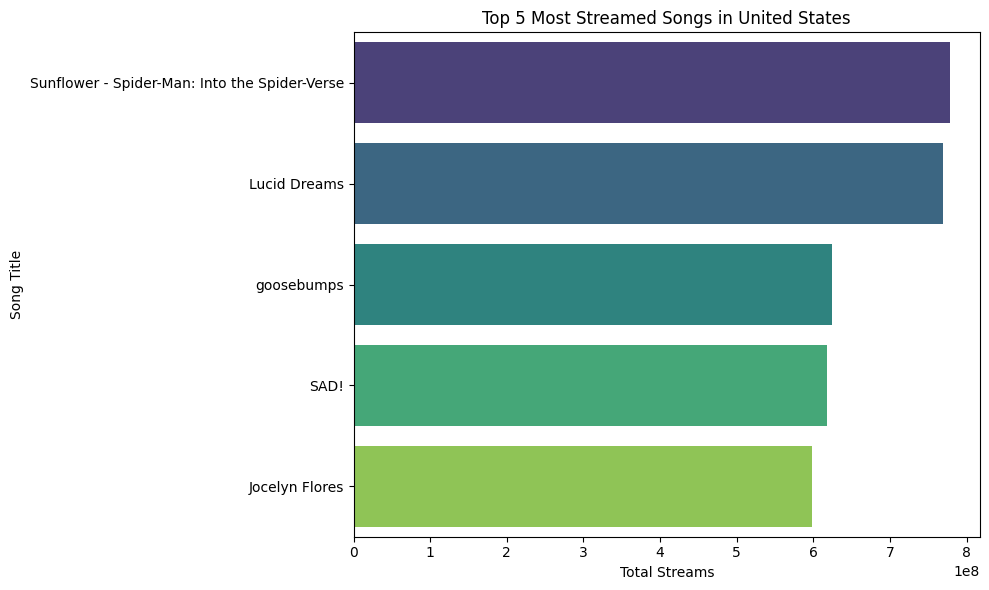

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

country = "United States"
top5 = top5_per_country[top5_per_country['country'] == country]

plt.figure(figsize=(10, 6))
sns.barplot(data=top5, y='track_name', x='streams', palette='viridis')
plt.title(f"Top 5 Most Streamed Songs in {country}")
plt.xlabel("Total Streams")
plt.ylabel("Song Title")
plt.tight_layout()
plt.show()

In [16]:
print(df['country'].unique())

['Argentina' 'Australia' 'Brazil' 'Austria' 'Belgium' 'Colombia' 'Bolivia'
 'Denmark' 'Bulgaria' 'Canada' 'Chile' 'Costa Rica' 'Czech Republic'
 'Finland' 'Dominican Republic' 'Ecuador' 'El Salvador' 'Estonia' 'France'
 'Germany' 'Global' 'Greece' 'Guatemala' 'Honduras' 'Hong Kong' 'Hungary'
 'Iceland' 'Indonesia' 'Ireland' 'Italy' 'Japan' 'Latvia' 'Lithuania'
 'Malaysia' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Norway' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Singapore' 'Spain' 'Slovakia' 'Sweden' 'Taiwan' 'Switzerland' 'Turkey'
 'United Kingdom' 'United States' 'Uruguay' 'Thailand' 'Vietnam' 'Egypt'
 'India' 'Israel' 'Morocco' 'Romania' 'Saudi Arabia' 'South Africa'
 'United Arab Emirates' 'Russia' 'Ukraine' 'South Korea']


### Getting the Top Artist in Each Country

In [17]:
top_artists_by_country = (
    df.groupby(["country", "artist"])["streams"]
    .sum()
    .reset_index()
    .sort_values(["country", "streams"], ascending=[True, False])
)

top_artist_each_country = top_artists_by_country.groupby('country').head(1)
print(top_artist_each_country.head(20))

                  country            artist       streams
1362            Argentina      Paulo Londra  3.626720e+08
2164            Australia        Ed Sheeran  7.028312e+08
4095              Austria        Ed Sheeran  4.621411e+07
7025              Belgium        Ed Sheeran  9.709285e+07
9042              Bolivia         Bad Bunny  3.774461e+07
11569              Brazil  Marília Mendonça  1.825303e+09
12979            Bulgaria         Pop Smoke  5.152734e+06
13726              Canada             Drake  6.949027e+08
15368               Chile         Bad Bunny  7.501016e+08
17372            Colombia         Bad Bunny  1.921952e+08
19089          Costa Rica         Bad Bunny  7.456177e+07
22674      Czech Republic      Viktor Sheen  5.750029e+07
23401             Denmark        Ed Sheeran  1.995718e+08
25096  Dominican Republic         Bad Bunny  8.428656e+07
27041             Ecuador         Bad Bunny  1.128313e+08
28995               Egypt              Wegz  3.144959e+07
29159         

### Barplot of Top Artist in each Country

In [18]:
top_countries = (
    df.groupby('country')['streams']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

top_countries = list(dict.fromkeys(top_countries))
print("Top countries:", top_countries)

Top countries: ['Global', 'United States', 'Brazil', 'Mexico', 'Germany', 'United Kingdom', 'Spain', 'Italy', 'France', 'Australia']


#### Filtering the Top Artist

In [19]:
filtered_top_artists = top_artist_each_country[
    top_artist_each_country['country'].isin(top_countries)
]

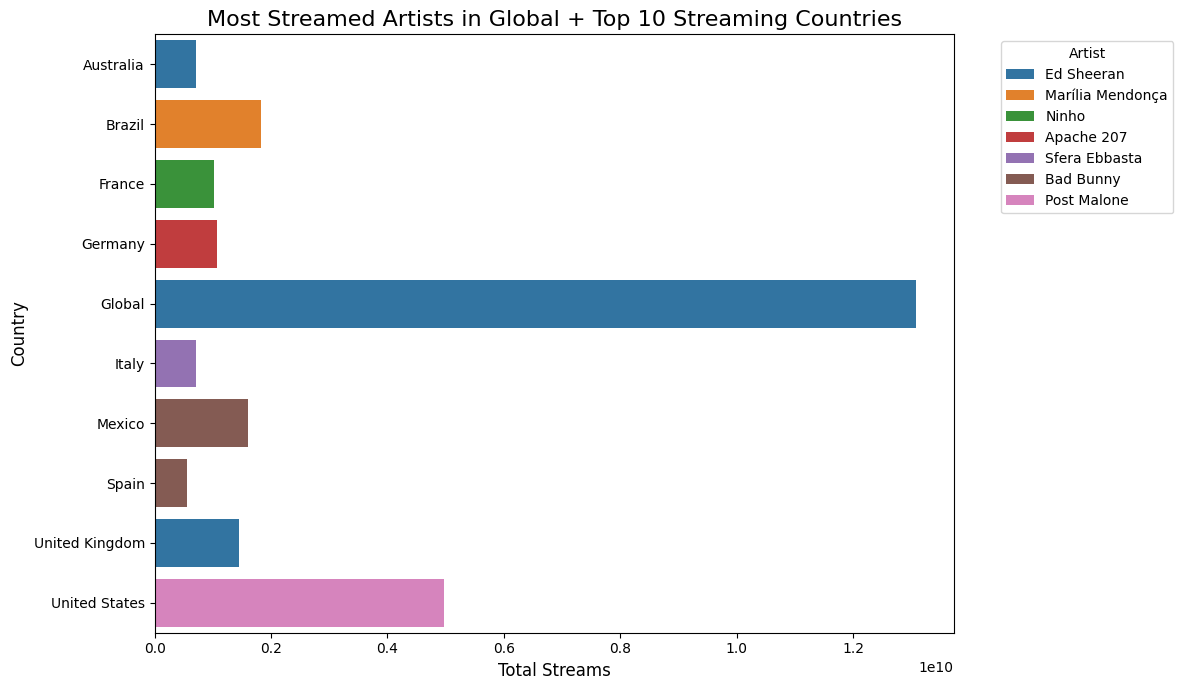

In [20]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=filtered_top_artists,
    x='streams',
    y='country',
    hue='artist',
    dodge=False
)

plt.title('Most Streamed Artists in Global + Top 10 Streaming Countries', fontsize=16)
plt.xlabel('Total Streams', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Top Artists in the Bottom 10 Countries in terms of stream size

In [21]:
# Looked at the top artists in the top 10 biggest countries, now looking at the other end of the scale

In [22]:
country_stream_totals = df[df['country'] != 'Global'].groupby('country')['streams'].sum()
bottom_countries = country_stream_totals.nsmallest(10).index.tolist()

print("Bottom countries:", bottom_countries)

Bottom countries: ['Luxembourg', 'South Korea', 'Bulgaria', 'Estonia', 'Nicaragua', 'Latvia', 'Lithuania', 'United Arab Emirates', 'Egypt', 'Morocco']


In [23]:
bottom_top_artists = top_artist_each_country[
    top_artist_each_country['country'].isin(bottom_countries)
]

#### Which Artists are dominating in the smaller regions?

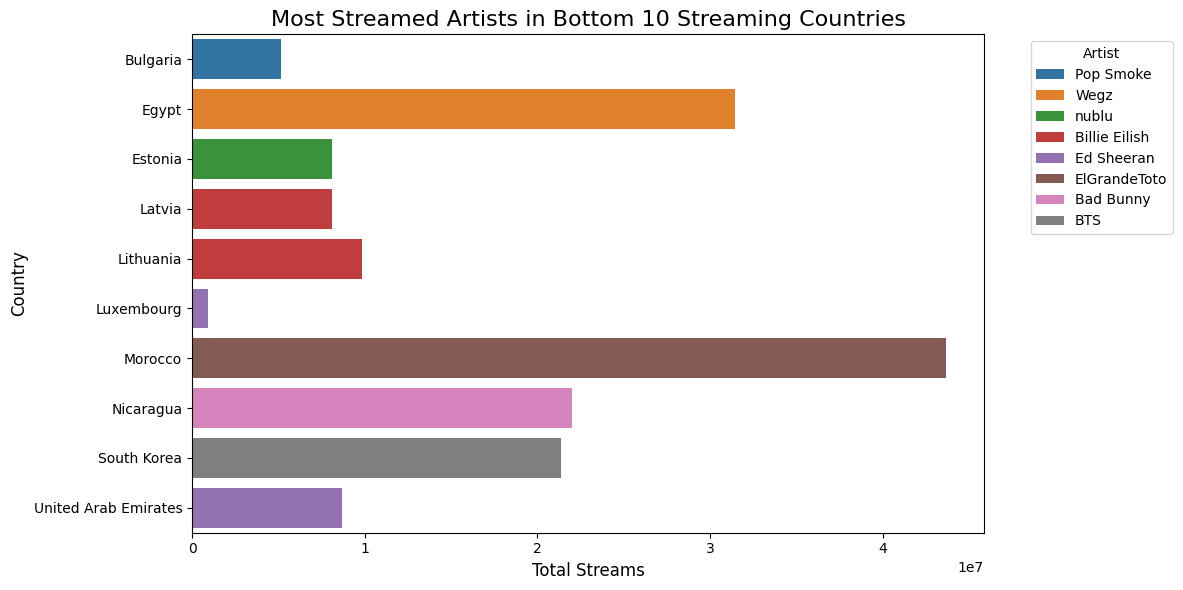

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=bottom_top_artists,
    x='streams',
    y='country',
    hue='artist',
    dodge=False
)

plt.title('Most Streamed Artists in Bottom 10 Streaming Countries', fontsize=16)
plt.xlabel('Total Streams', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Correlation between Streams and Chart Rank

#### Do higher chart ranks mean higher streaming numbers?

In [25]:
df = df[(df['rank'] >= 1) & (df['rank'] <= 200)]
df = df[df['streams'] > 0]

### Streams Vs. Rank

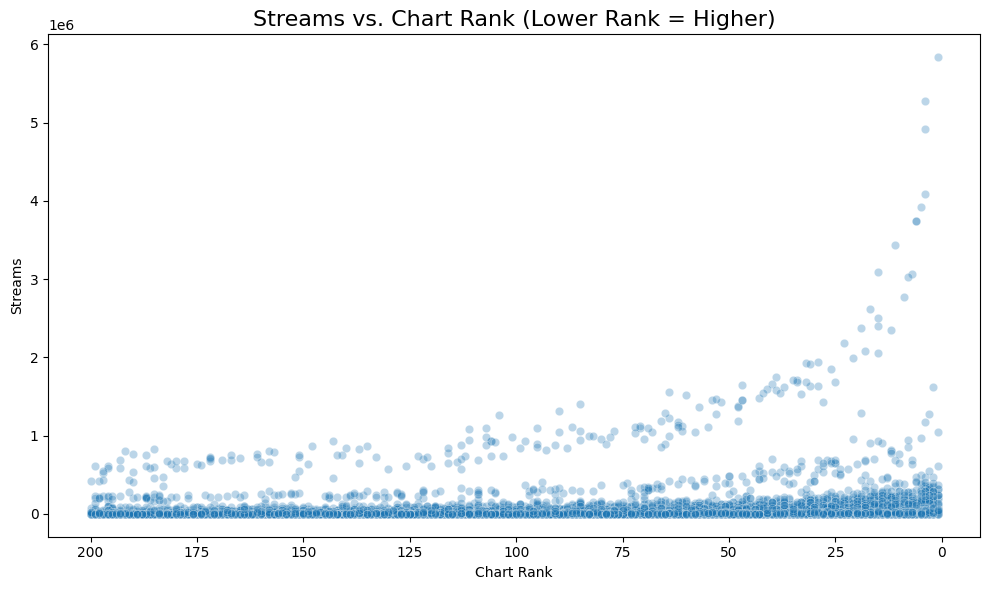

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(10000), x='rank', y='streams', alpha=0.3)  # sample for speed
plt.gca().invert_xaxis()  # rank 1 is better than rank 200, so flip it
plt.title('Streams vs. Chart Rank (Lower Rank = Higher)', fontsize=16)
plt.xlabel('Chart Rank')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

In [27]:
# Streams tend to be higher the closer they are to No. 1

In [28]:
# The correlation is weak becuase there are other factors I am not considering,
# such as time-decay and regional popularity

In [29]:
correlation = df[['rank', 'streams']].corr()
print(correlation)

             rank   streams
rank     1.000000 -0.131008
streams -0.131008  1.000000


## Regression Line Plot

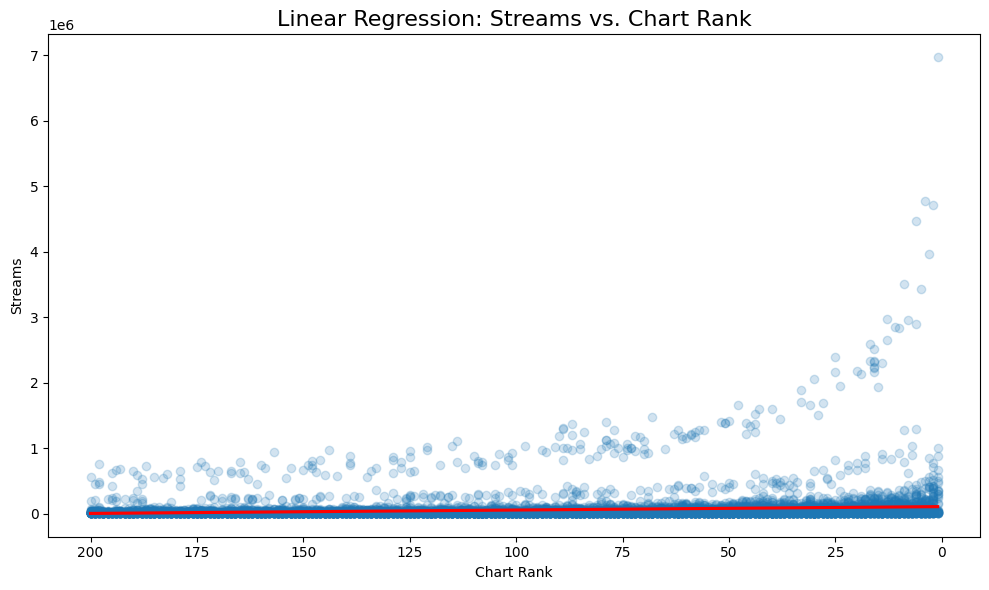

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df.sample(10000),
    x='rank',
    y='streams',
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)
plt.gca().invert_xaxis()
plt.title('Linear Regression: Streams vs. Chart Rank', fontsize=16)
plt.xlabel('Chart Rank')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

## Seperate Regression Plots per Country

### Starting with the USA

In [31]:
usa_df = df[df['country'] == 'United States']

In [32]:
usa_sample = usa_df.sample(10000, random_state=42)

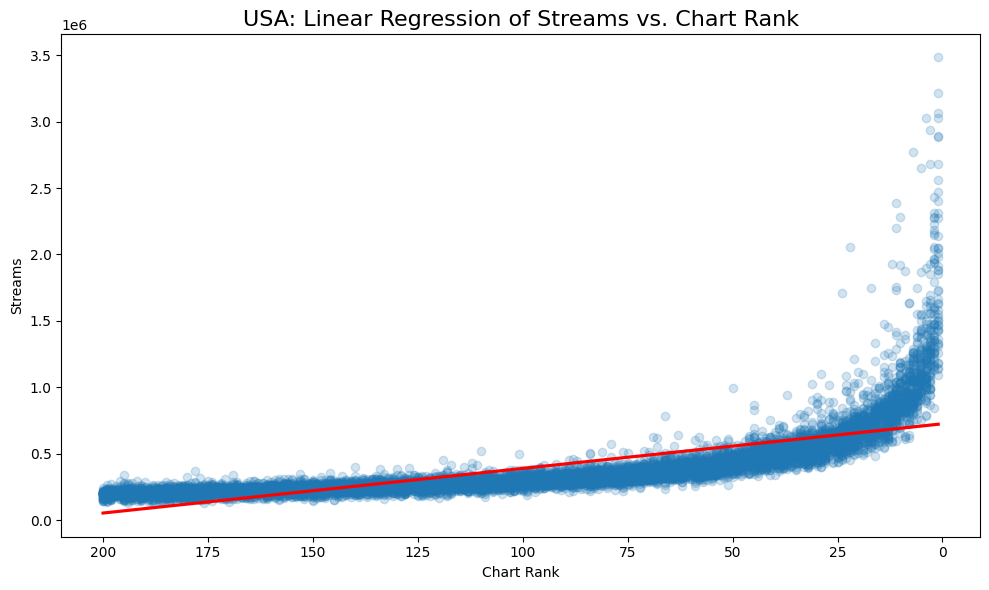

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=usa_sample,
    x='rank',
    y='streams',
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)
plt.gca().invert_xaxis()
plt.title('USA: Linear Regression of Streams vs. Chart Rank', fontsize=16)
plt.xlabel('Chart Rank')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

### Plotting Mexico to compare with the USA

In [34]:
mexico_df = df[df['country'] == 'Mexico']

In [35]:
mexico_sample = mexico_df.sample(10000, random_state=42)

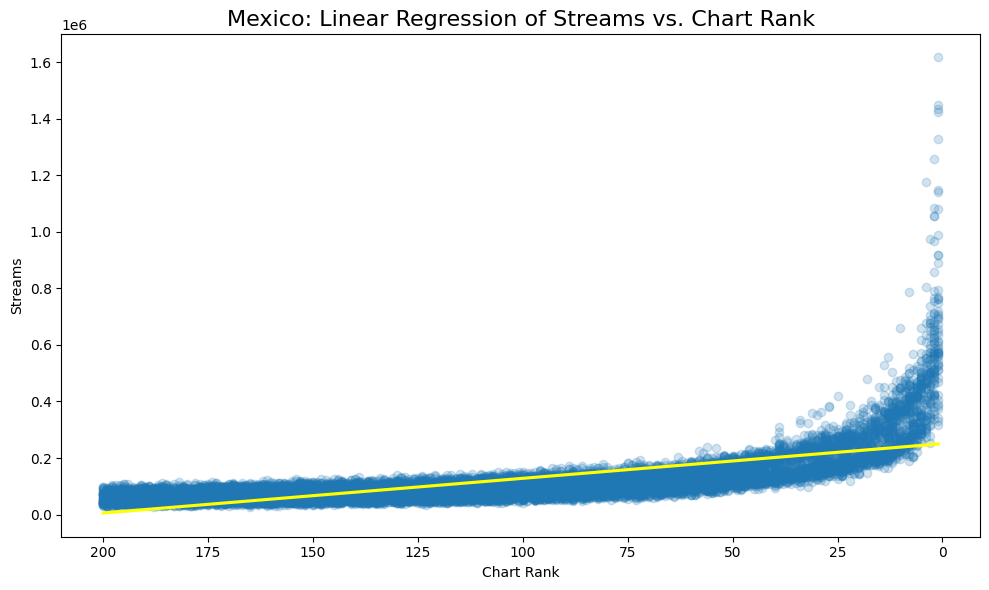

In [36]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=mexico_sample,
    x='rank',
    y='streams',
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'yellow'}
)
plt.gca().invert_xaxis()
plt.title('Mexico: Linear Regression of Streams vs. Chart Rank', fontsize=16)
plt.xlabel('Chart Rank')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

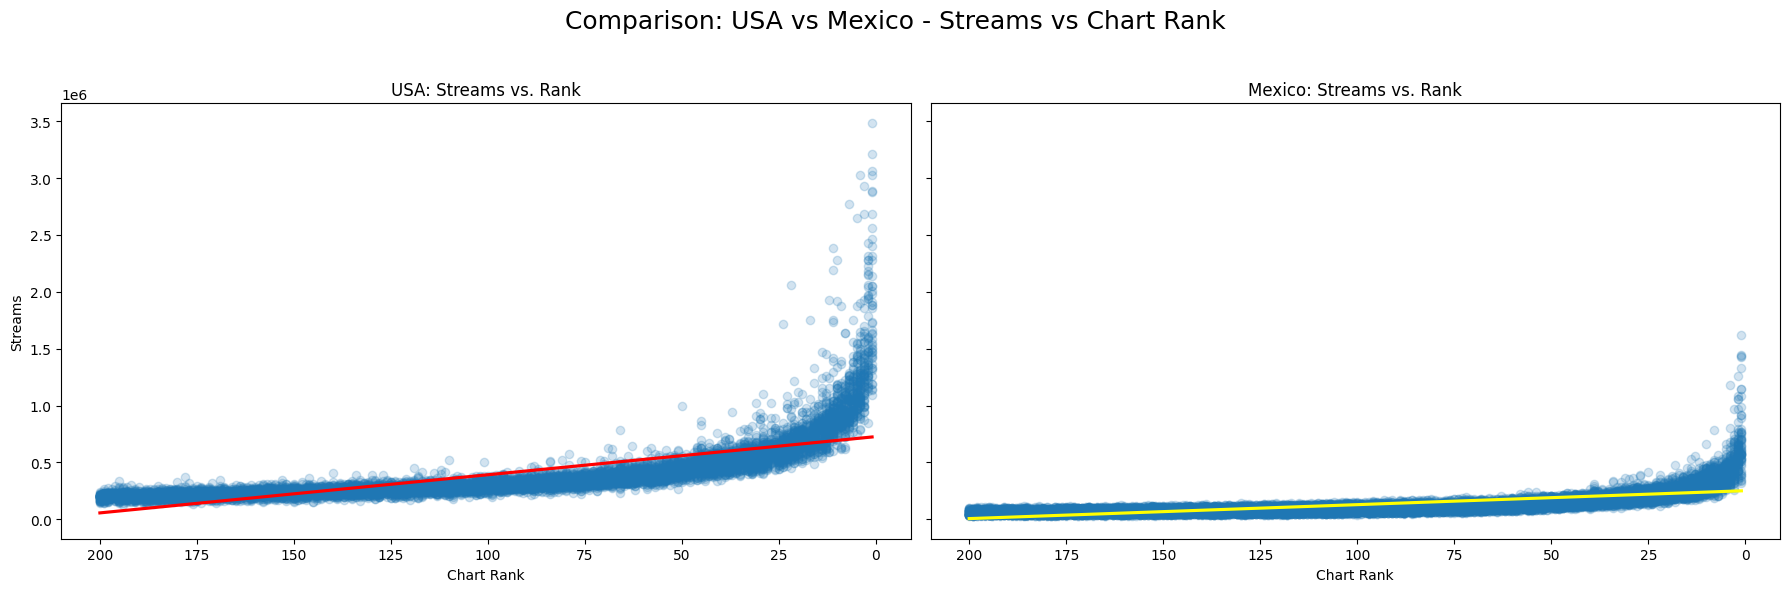

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

usa_sample = df[df['country'] == 'United States'].sample(10000, random_state=42)
mexico_sample = df[df['country'] == 'Mexico'].sample(10000, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# USA plot
sns.regplot(
    data=usa_sample,
    x='rank',
    y='streams',
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'},
    ax=axes[0]
)
axes[0].invert_xaxis()
axes[0].set_title('USA: Streams vs. Rank')
axes[0].set_xlabel('Chart Rank')
axes[0].set_ylabel('Streams')

# Mexico plot
sns.regplot(
    data=mexico_sample,
    x='rank',
    y='streams',
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'yellow'},
    ax=axes[1]
)
axes[1].invert_xaxis()
axes[1].set_title('Mexico: Streams vs. Rank')
axes[1].set_xlabel('Chart Rank')
axes[1].set_ylabel('')

plt.suptitle('Comparison: USA vs Mexico - Streams vs Chart Rank', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### The USA has a steeper curve due to higher volume of streams in relation to chart rank

##### This steeper curve could be as a result of the USA having a bigger and broader market

## Time-Based EDA

### Longevity of Songs

In [38]:
song_longevity = (
    df.groupby(['track_name', 'artist', 'country'])['date']
    .nunique()
    .reset_index(name='days_on_chart')
    .sort_values(by='days_on_chart', ascending=False)
)

# Top-10 Longest Lasting songs in the charts
print(song_longevity.head(10))

                  track_name                         artist         country  \
160511             Me Rehúso                    Danny Ocean         Bolivia   
53786                 Crimen                 Gustavo Cerati       Argentina   
168970        Mr. Brightside                    The Killers       Australia   
185515        Ohne mein Team  Bonez MC, RAF Camora, Maxwell         Austria   
237053    Spaghetti del Rock                      Divididos       Argentina   
222860  Say You Won't Let Go                   James Arthur       Australia   
168992        Mr. Brightside                    The Killers  United Kingdom   
222903  Say You Won't Let Go                   James Arthur     Philippines   
310799                   囍帖街                        Kay Tse       Hong Kong   
222908  Say You Won't Let Go                   James Arthur       Singapore   

        days_on_chart  
160511           1823  
53786            1811  
168970           1810  
185515           1806  
237053    

#### Extracting the Top 5 Longest Lasting songs in the Charts

In [39]:
top5_longevity = [
    ('Me Rehúso', 'Danny Ocean', 'Bolivia'),
    ('Crimen', 'Gustavo Cerati', 'Argentina'),
    ('Mr. Brightside', 'The Killers', 'Australia'),
    ('Ohne mein Team', 'Bonez MC, RAF Camora, Maxwell', 'Austria'),
    ('Spaghetti del Rock', 'Divididos', 'Argentina')
]

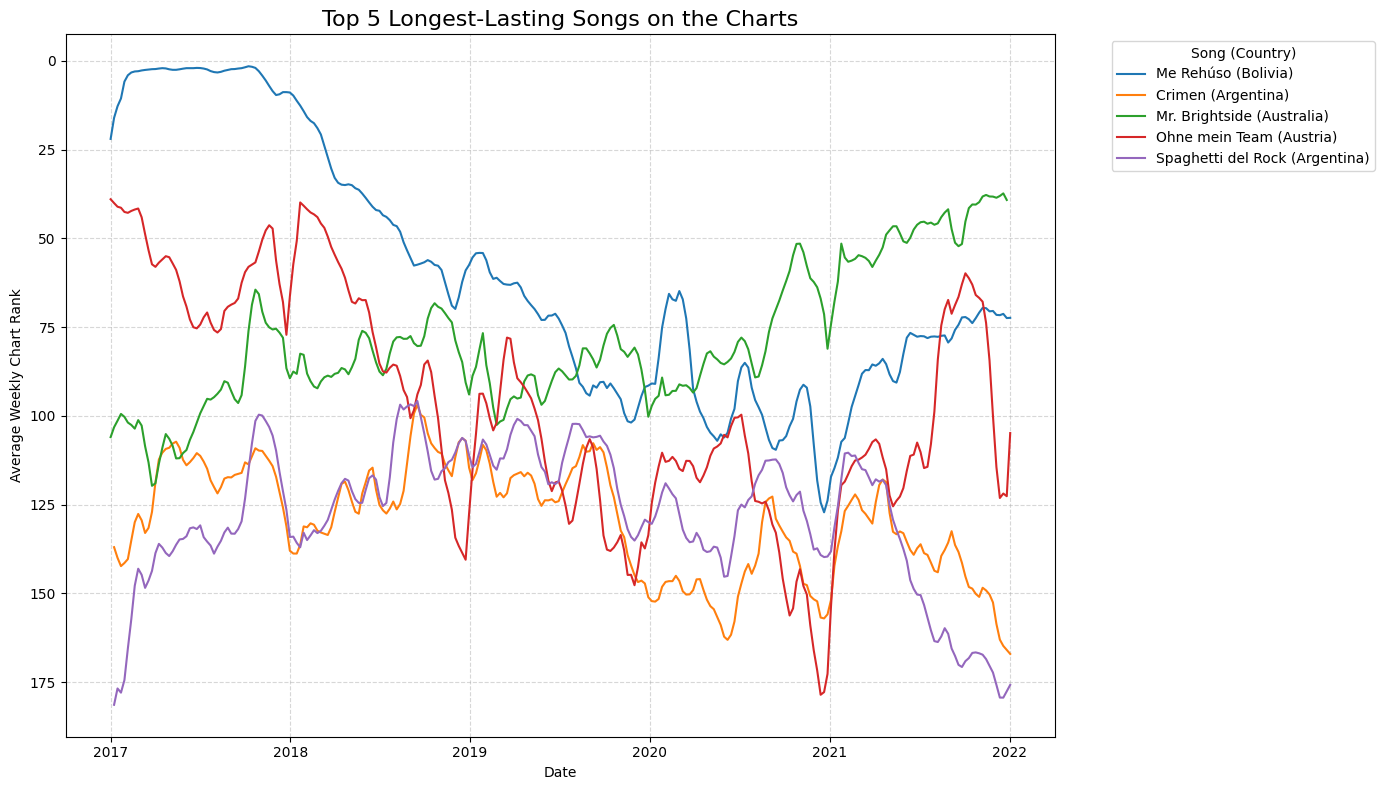

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

for title, artist, country in top5_longevity:
    song_data = df[
        (df['track_name'] == title) &
        (df['artist'] == artist) &
        (df['country'] == country)
    ].sort_values('date')

    song_weekly = song_data.set_index('date').resample('W')['rank'].mean().reset_index()

    song_weekly['rank'] = song_weekly['rank'].rolling(window=4, min_periods=1).mean()

    sns.lineplot(
        data=song_weekly,
        x='date',
        y='rank',
        label=f'{title} ({country})'
    )

plt.gca().invert_yaxis()
plt.title('Top 5 Longest-Lasting Songs on the Charts', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Average Weekly Chart Rank')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Song (Country)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Judging from the Chart, we can clearly tell that "Mr.Brightside" is a classic

### Seasonal Trends

In [43]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

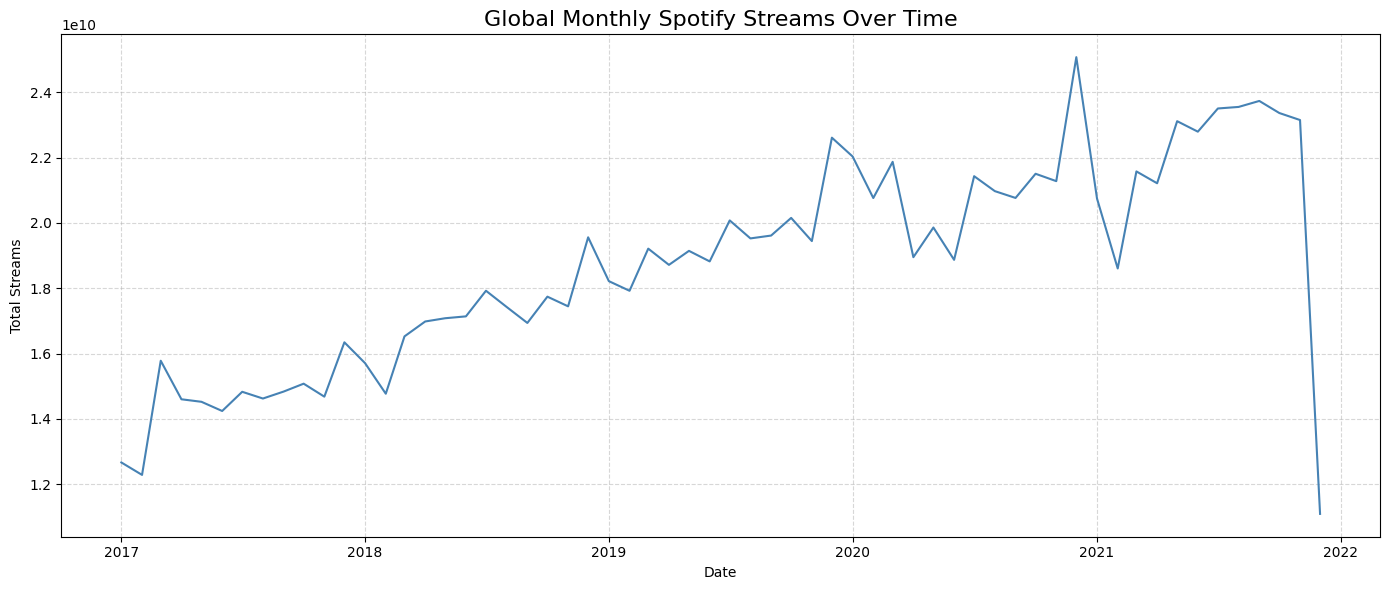

In [45]:
monthly_trends = (
    df.groupby(['year', 'month'])['streams']
    .sum()
    .reset_index()
)

monthly_trends['year_month'] = pd.to_datetime(monthly_trends[['year', 'month']].assign(day=1))

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trends, x='year_month', y='streams', color='steelblue')

plt.title('Global Monthly Spotify Streams Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/f7/2prvt6bn1c16021g9h5n59200000gn/T/ipykernel_23945/2128001200.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_trend, x='month', y='streams', palette='coolwarm')


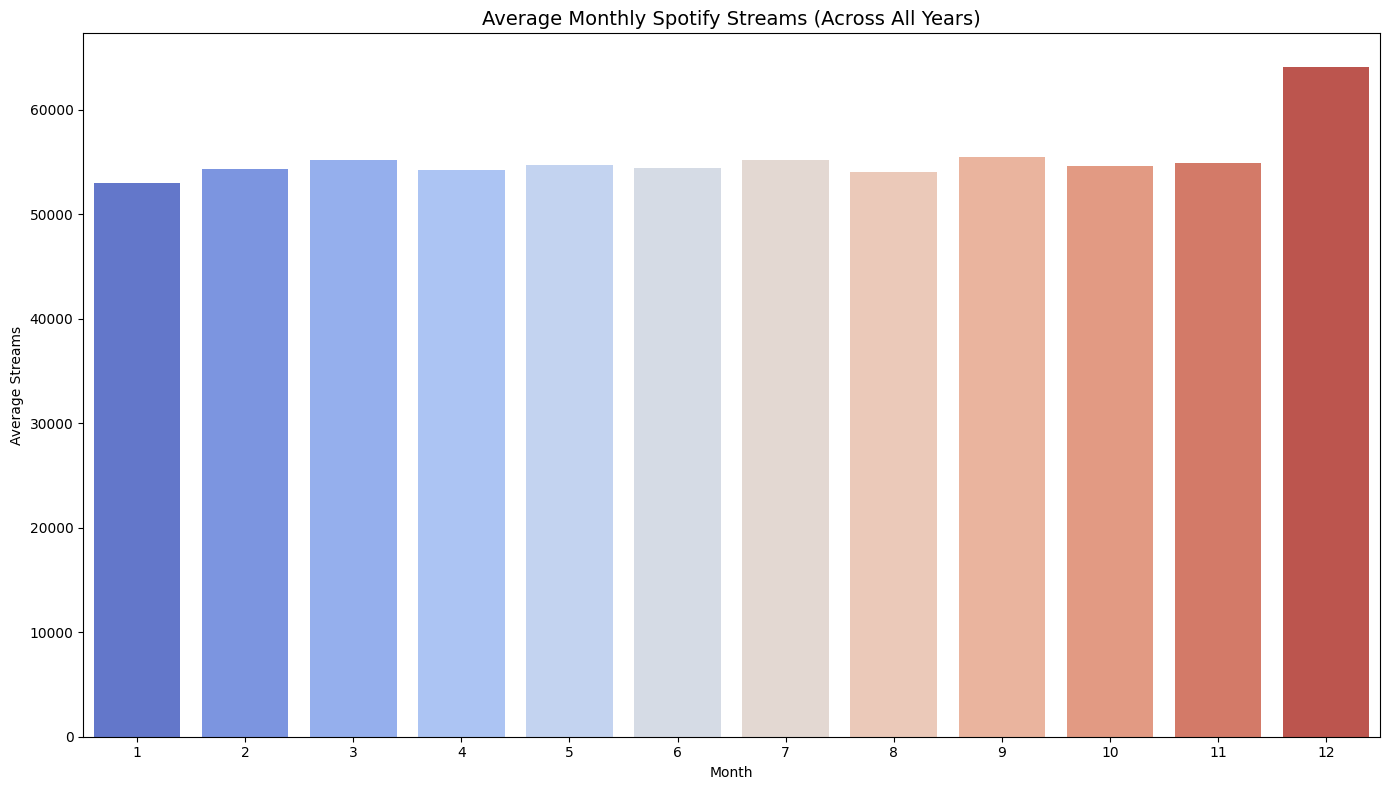

In [47]:
# Group by month across all years
seasonal_trend = df.groupby('month')['streams'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=seasonal_trend, x='month', y='streams', palette='coolwarm')

plt.title('Average Monthly Spotify Streams (Across All Years)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Streams')
plt.tight_layout()
plt.show()

##### December seems to be the main "spike" month for streams across the 5 year span

#### The most streamed artist in December

In [48]:
december_df = df[df['month'] == 12]

In [51]:
december_top_artists = (
    december_df.groupby('artist')['streams']
    .sum()
    .reset_index()
    .sort_values(by='streams', ascending=False)
    .head(10)  # Top 10 December legends
)

/var/folders/f7/2prvt6bn1c16021g9h5n59200000gn/T/ipykernel_23945/1280839105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


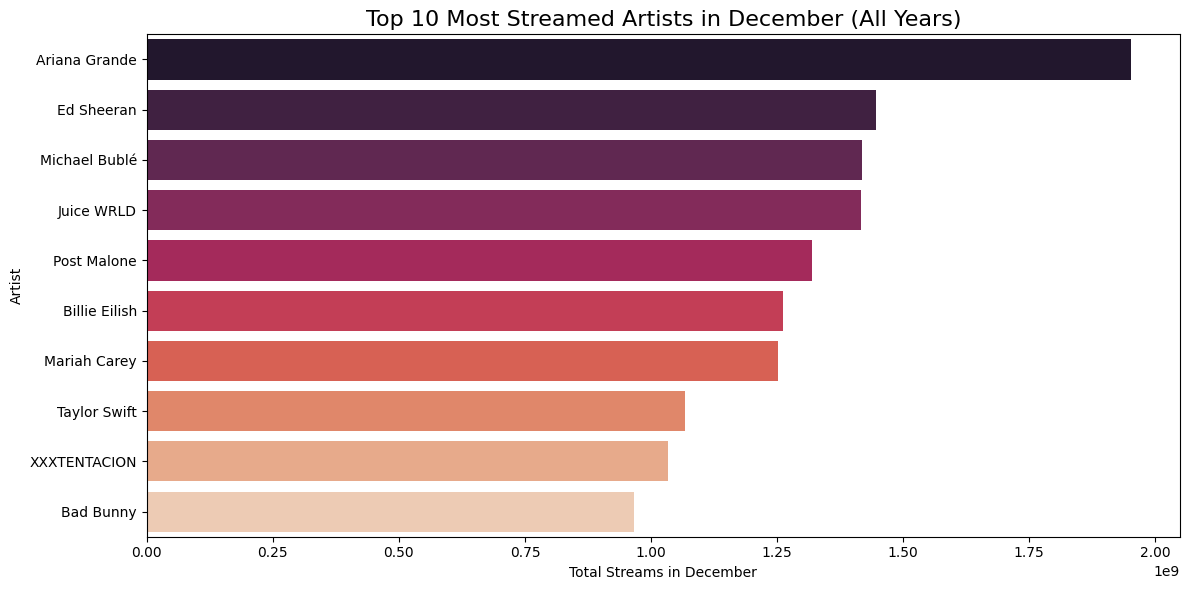

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=december_top_artists,
    x='streams',
    y='artist',
    palette='rocket'
)

plt.title('Top 10 Most Streamed Artists in December (All Years)', fontsize=16)
plt.xlabel('Total Streams in December')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

##### Ariana Grande is the most streamed artist in December, she beats Mariah Carey!

## Spotify Growth in Smaller Markets

#### Identifying the smaller countries/markets

In [53]:
small_countries = (
    df[df['country'] != 'Global']
    .groupby('country')['streams']
    .sum()
    .nsmallest(10)
    .index.tolist()
)

print("Smallest streaming countries:", small_countries)

Smallest streaming countries: ['Luxembourg', 'South Korea', 'Bulgaria', 'Estonia', 'Nicaragua', 'Latvia', 'Lithuania', 'United Arab Emirates', 'Egypt', 'Morocco']


In [54]:
small_df = df[df['country'].isin(small_countries)]

small_monthly_trends = (
    small_df.groupby(['country', 'year', 'month'])['streams']
    .sum()
    .reset_index()
)

small_monthly_trends['year_month'] = pd.to_datetime(
    small_monthly_trends[['year', 'month']].assign(day=1)
)

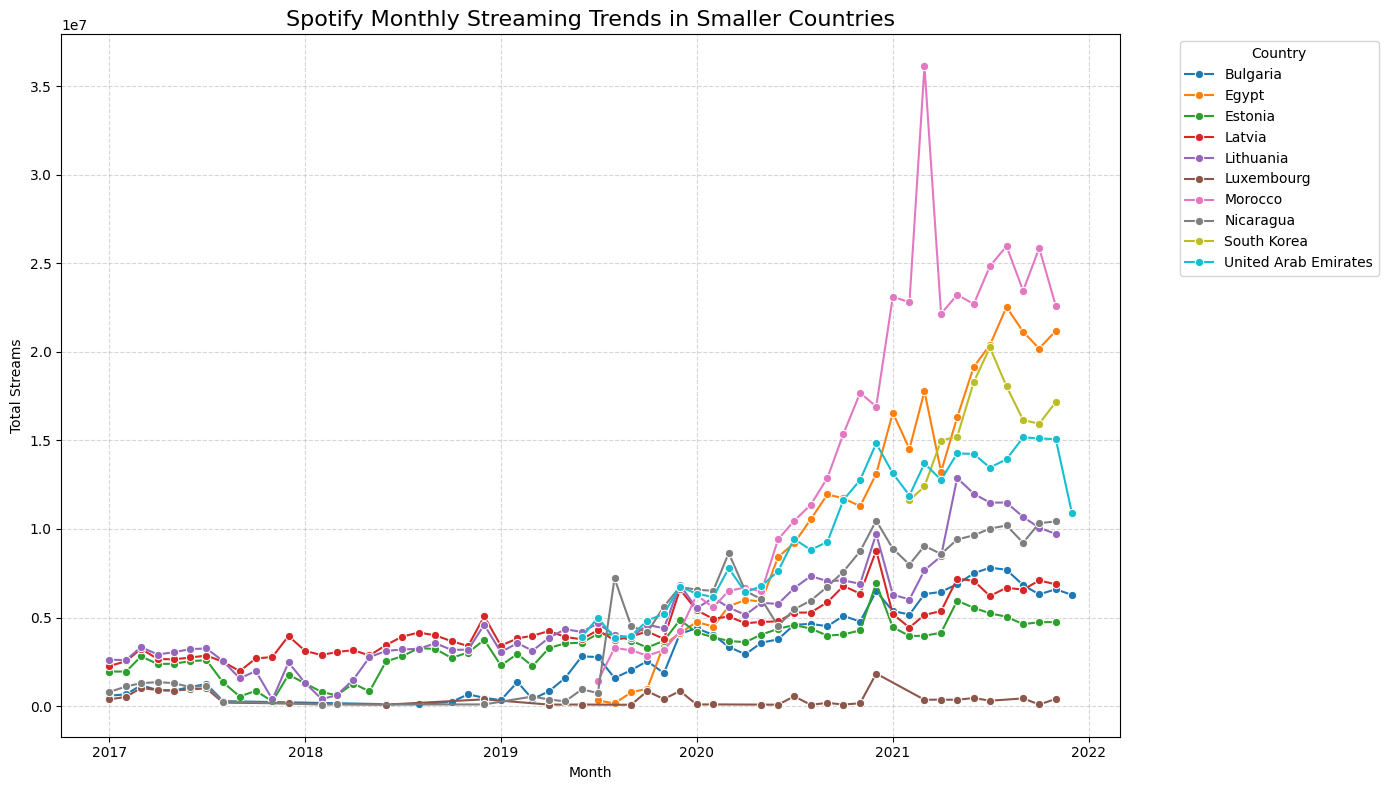

In [55]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=small_monthly_trends,
    x='year_month',
    y='streams',
    hue='country',
    marker='o'
)

plt.title('Spotify Monthly Streaming Trends in Smaller Countries', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Streams')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### Morocco had a huge spike in streams in 2021

##### Luxembourg showed not increase in streams

##### Bulgaria seems to have the steadiest increase in growth

## K-Means Clustering on Country-Level Monthly Stream Patterns

#### Preparing the Data

In [56]:
country_monthly = df.groupby(['country', 'year', 'month'])['streams'].sum().reset_index()
country_monthly['year_month'] = pd.to_datetime(country_monthly[['year', 'month']].assign(day=1))
pivot = country_monthly.pivot(index='country', columns='year_month', values='streams').fillna(0)
pivot.head()

year_month,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
country,,,,,,,,,,,,,,,,,,,,,
Argentina,200467968.0,193960016.0,208207967.0,200942961.0,201178865.0,194446971.0,221081939.0,233804765.0,238467300.0,251138429.0,...,409898907.0,376213089.0,408374528.0,419761554.0,484320660.0,494268623.0,463463981.0,480493735.0,467039637.0,489494085.0
Australia,226426932.0,223936897.0,282679237.0,243754113.0,247955574.0,249716561.0,261122621.0,294027061.0,300597284.0,315536481.0,...,358002344.0,341030973.0,363178702.0,330035105.0,336621187.0,350220662.0,348847767.0,347763889.0,349405524.0,227839549.0
Austria,24184172.0,23547237.0,27797543.0,24962317.0,25665747.0,28882035.0,30579620.0,28132615.0,27378644.0,29070242.0,...,50500439.0,50458962.0,53857254.0,53094084.0,58565868.0,56599508.0,54655363.0,55808325.0,55990047.0,77244873.0
Belgium,37374447.0,36419588.0,48882254.0,45011935.0,46607580.0,47224528.0,46431938.0,46443158.0,44240494.0,47913145.0,...,84319490.0,81696187.0,91544219.0,84734990.0,81050511.0,82878823.0,81018463.0,85251207.0,85123960.0,0.0
Bolivia,5514322.0,6192651.0,6524796.0,6170606.0,6778264.0,6993117.0,7917103.0,8294681.0,9506373.0,9616988.0,...,31110404.0,30286522.0,33111886.0,31132610.0,34486876.0,36476284.0,33170288.0,32158062.0,29157294.0,30397390.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(pivot)

countries = pivot.index